# Assignment - 1
## Donal Loitam(AI21BTECH11009)

In [1]:
%matplotlib inline

In [1]:
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import numpy as np

# Define parameters
sigma = 1
grid_size = 6

# Create grid
x = np.linspace(-2, 2, grid_size)
y = np.linspace(-2, 2, grid_size)
X, Y = np.meshgrid(x, y)

# Compute Gaussian function
G = 1 / (2 * np.pi * sigma**2) * np.exp(-(X**2 + Y**2) / (2 * sigma**2))

# Compute Laplacian of Gaussian
L = np.gradient(np.gradient(G, axis=0), axis=0) + np.gradient(np.gradient(G, axis=1), axis=1)


print(X)
print(Y)
print("Original Gaussian Kernel:")
print(G)
print("\nLaplacian of Gaussian Kernel:")
print(L)


[[-2.  -1.2 -0.4  0.4  1.2  2. ]
 [-2.  -1.2 -0.4  0.4  1.2  2. ]
 [-2.  -1.2 -0.4  0.4  1.2  2. ]
 [-2.  -1.2 -0.4  0.4  1.2  2. ]
 [-2.  -1.2 -0.4  0.4  1.2  2. ]
 [-2.  -1.2 -0.4  0.4  1.2  2. ]]
[[-2.  -2.  -2.  -2.  -2.  -2. ]
 [-1.2 -1.2 -1.2 -1.2 -1.2 -1.2]
 [-0.4 -0.4 -0.4 -0.4 -0.4 -0.4]
 [ 0.4  0.4  0.4  0.4  0.4  0.4]
 [ 1.2  1.2  1.2  1.2  1.2  1.2]
 [ 2.   2.   2.   2.   2.   2. ]]
Original Gaussian Kernel:
[[0.00291502 0.01048429 0.01988326 0.01988326 0.01048429 0.00291502]
 [0.01048429 0.03770822 0.07151293 0.07151293 0.03770822 0.01048429]
 [0.01988326 0.07151293 0.1356229  0.1356229  0.07151293 0.01988326]
 [0.01988326 0.07151293 0.1356229  0.1356229  0.07151293 0.01988326]
 [0.01048429 0.03770822 0.07151293 0.07151293 0.03770822 0.01048429]
 [0.00291502 0.01048429 0.01988326 0.01988326 0.01048429 0.00291502]]

Laplacian of Gaussian Kernel:
[[ 0.0018297   0.00185549 -0.00035165 -0.00035165  0.00185549  0.0018297 ]
 [ 0.00185549 -0.01032158 -0.03349567 -0.03349567 -0.01

In [2]:
# Example 1: Grayscale image with constant intensity values
constant_intensity_image = np.ones((4, 4)) * 128  # 4x4 image with intensity 128
constant_intensity_fft = np.fft.fftshift(np.fft.fft2(constant_intensity_image))
constant_intensity_phase_spectrum = np.angle(constant_intensity_fft)

print("Phase Spectrum of Constant Intensity Image:")
print(constant_intensity_phase_spectrum)


Phase Spectrum of Constant Intensity Image:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [6]:
# Example 2: Binary image with sharp edges
binary_image = np.array([
    [1, 0, 1, 0],
    [1, 0, 1, 0],
    [1, 0, 1, 0],
    [1, 0, 1, 0],
])
# binary_image = 1 - binary_image
# print(binary_image)
binary_fft = np.fft.fftshift(np.fft.fft2(binary_image))
binary_phase_spectrum = np.angle(binary_fft)

print("Phase Spectrum of Binary Image:")
print(binary_phase_spectrum)


Phase Spectrum of Binary Image:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [4]:
import numpy as np

# Define parameters
amplitude = 100  # Amplitude of the cosine function
frequency = 0.1  # Frequency of the cosine function (cycles per pixel)

# Generate 4x4 image representing a cosine function
x = np.arange(4)
y = np.arange(4)
X, Y = np.meshgrid(x, y)
cosine_image = amplitude * np.cos(2 * np.pi * frequency * X)

print("Cosine Function Image:")
print(cosine_image)
# Compute the Fourier transform of the cosine function image
cosine_fft = np.fft.fftshift(np.fft.fft2(cosine_image))

# Compute the phase spectrum
phase_spectrum = np.angle(cosine_fft)

print("Phase Spectrum of Cosine Function Image:")
print(phase_spectrum)


Cosine Function Image:
[[100.          80.90169944  30.90169944 -30.90169944]
 [100.          80.90169944  30.90169944 -30.90169944]
 [100.          80.90169944  30.90169944 -30.90169944]
 [100.          80.90169944  30.90169944 -30.90169944]]
Phase Spectrum of Cosine Function Image:
[[ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          1.01722197  0.         -1.01722197]
 [ 0.          0.          0.          0.        ]]


# PART-1: The Human Eye

In this problem you will implement the contrast sensitivity function (CSF) based living room design.
Write a Python script that accepts the TV specifications (size, resolution), the available distance for
the couch placement (from the TV), and outputs the “optimal” distance. Recall from class that this
distance corresponds to 6 cycles/degree being intended at the visual axis. Assume that the couch is
placed directly in front of the TV. You are expected to handle corner cases gracefully.

In [3]:
def calc_optimal_couch_distance(TV_size: tuple, TV_res: tuple, available_dist: int, dist_in='inches'):
    """
        Outputs and returns the 'optimal' distance of the couch from the TV, 
            and if the available space is enough or not.
        Args:
            TV_size: a tuple consisting of (width, height) of the TV in inches(default)
            TV_res:  a tuple consisting of (x_resolution, y_resolution) of the TV in pixels
            available_dist: the available distance for the couch placement (from the TV) in inches(default)
            dist_in: the unit of distance in which TV_size and available dist are given

    """
    
    width, height = TV_size
    x_resolution, y_resolution = TV_res
    
    # 1 cycle corresponds to 2 pixels, d = TV width corresponding to 12 pixels or 6 cycles
    width_per_pixel = width/x_resolution
    d = 12 * width_per_pixel
    
    # Now, a simple trigonometric formula gives us the opt_dist, Assuming a degree subtended at the visual axis by d 
    # 1/2 degrees subtended by d/2 width
    # tan(1/2) = d/(2 * opt_dist) 
    
    opt_dist = d /(2 * np.tan(0.5 * np.pi / 180))
    
    if(available_dist >= opt_dist):
        print("Available Distance is more, hence it is feasible.")
        
    else:
        print("Available Distance is less, hence it is NOT feasible. You need more space.")
    
    print(f"The optimal Distance of your couch from the TV is {opt_dist} {dist_in}")
    
    return opt_dist

In [4]:
# Defining parameters
TV_size = (55, 30)
TV_res = (1920, 1080)
available_dist = 25

# Calculation of optimal distance
opt1 = calc_optimal_couch_distance(TV_size=TV_size, TV_res=TV_res, available_dist=available_dist)

Available Distance is more, hence it is feasible.
The optimal Distance of your couch from the TV is 19.694924240975087 inches


In [5]:
# Defining parameters
TV_size = (55, 30)
TV_res = (1920, 1080)
available_dist = 15

# Calculation of optimal distance
opt2 = calc_optimal_couch_distance(TV_size=TV_size, TV_res=TV_res, available_dist=available_dist)

Available Distance is less, hence it is NOT feasible. You need more space.
The optimal Distance of your couch from the TV is 19.694924240975087 inches


# PART-2: Gray Scale Images
For this part, work with the gray scale images aerial, airplane, APC.

### Q1. 
Read the contents of an image into an array I (recall from class that digital images are represented as an array of numbers).  Use matplotlib to read and display images - https://matplotlib.org/tutorials/introductory/images.html. Display the image I (1)

In [6]:
def read_image(img_path:str):
    img = np.asarray(Image.open(img_path))
    return img

### Reading all the images and storing them with the same names for images in your code as in the database

In [7]:
# aerial - 5.2.09 , airplane - 7.1.02, APC - 7.1.08, Truck - 7.1.01, airport - 5.3.02

aerial_img_path = "5.2.09.tiff"
aerial = read_image(aerial_img_path)

airplane_img_path = "7.1.02.tiff"
airplane = read_image(airplane_img_path)

APC_img_path = "7.1.08.tiff"
APC = read_image(APC_img_path)

truck_img_path = "7.1.01.tiff"
truck = read_image(truck_img_path)

airport_img_path = "5.3.02.tiff"
airport = read_image(airport_img_path)

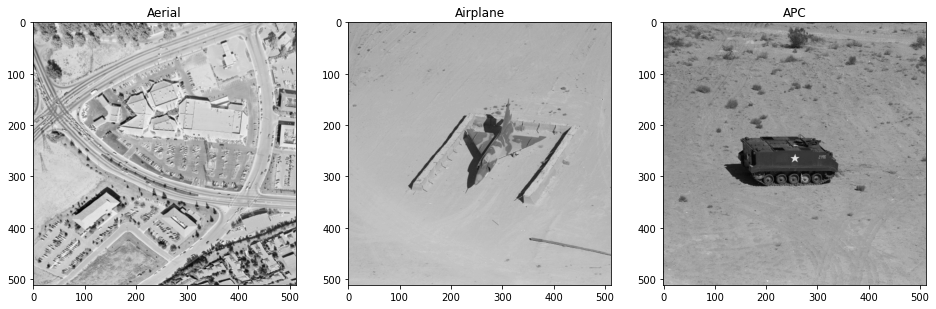

In [8]:
plt.figure(figsize=(16, 10))

plt.subplot(1, 3, 1)
plt.imshow(aerial, cmap='gray')
plt.title("Aerial")


plt.subplot(1, 3, 2)
plt.imshow(airplane, cmap='gray')
plt.title("Airplane")


plt.subplot(1, 3, 3)
plt.imshow(APC, cmap='gray')
plt.title("APC")


plt.show()

### Q2.
Print the maximum and minimum pixel values of I. Based on these values, how many bits are needed (used) per pixel? What is the resolution (i.e., width and height) of I? Print your answer
## Demonstration for "aerial"

In [9]:
max_pixel_value = np.max(aerial)
min_pixel_value = np.min(aerial)
pixel_value_range = max_pixel_value - min_pixel_value

# Number of bits needed/pixel would be the one which would be needed for the maximum pixel value(as was discussed in class)
n_bits_per_pixel = np.ceil(np.log2(max_pixel_value))

h, w = aerial.shape

print(f"The maximum pixel value of I = {max_pixel_value}.")
print(f"The minimum pixel value of I = {min_pixel_value}.")
print(f"The range of pixel values of I is thus = {pixel_value_range}.")
print(f"Image Resolution: {h} x {w}")
print(f"Based on these values, the number of bits needed per pixel is thus {int(n_bits_per_pixel)}.")

The maximum pixel value of I = 255.
The minimum pixel value of I = 12.
The range of pixel values of I is thus = 243.
Image Resolution: 512 x 512
Based on these values, the number of bits needed per pixel is thus 8.


### Q3. 
What is the size of the compressed image you downloaded? Print your answer. Based on the previous answers and assuming 256 gray levels, how efficienctly (compressed image size versus 8 bits per pixel size) is the image compressed for storage? Print your answer

## Demonstration for "aerial"

In [10]:
file_stats = os.stat(aerial_img_path)
file_size_in_kb = file_stats.st_size/1024
print(f'Size of the compressed image in KiloBytes(KB) is {file_size_in_kb}kB')

# Assuming 256 gray levels or equivalently 8 bits/pixel
n_bits_per_pixel = 8
total_img_pixels = h * w
total_Bytes = (n_bits_per_pixel * total_img_pixels)/8            # 1 Byte = 8 bits
total_kBs = total_Bytes/1024
print(f"Assuming, 256 gray levels, Total number of KiloBytes(KB) calculated theoretically = {int(total_kBs)} kB")
print("So, the image compression for storage is quite good.")
efficiency = total_kBs/file_size_in_kb
print(f"If we define Efficiency = 8 bits per pixel size/Compressed Image size, efficency = {efficiency} !")

Size of the compressed image in KiloBytes(KB) is 256.130859375kB
Assuming, 256 gray levels, Total number of KiloBytes(KB) calculated theoretically = 256 kB
So, the image compression for storage is quite good.
If we define Efficiency = 8 bits per pixel size/Compressed Image size, efficency = 0.9994890917270988 !


### Q4.
Write a function that accepts as input an image I and a bitplane index i.e., a number b such that
0 ≤ b ≤ B − 1. The function must display the bitplane b of the image I as a binary image. Use the
convention that b = 0 corresponds to the least significant bitplane and b = B − 1 corresponds to the
most significant bitplane.

In [11]:
def getBitplane(I: np.ndarray, b: int):
    """
        Displays the bitplane b of the image I as a binary image. 
              If b > B is given, it displays a "black" binary image.
        Args:
            I: image as a np.ndarray
            b: bitplane index 
                                                                             """
    
    bit_extractor = 1 << b
    result_arr = I & bit_extractor
    binary_bit_plane = (result_arr != 0).astype(int)   # converts non-zero entries to 1
    
    return binary_bit_plane


### Demonstration for "aerial" at different b's

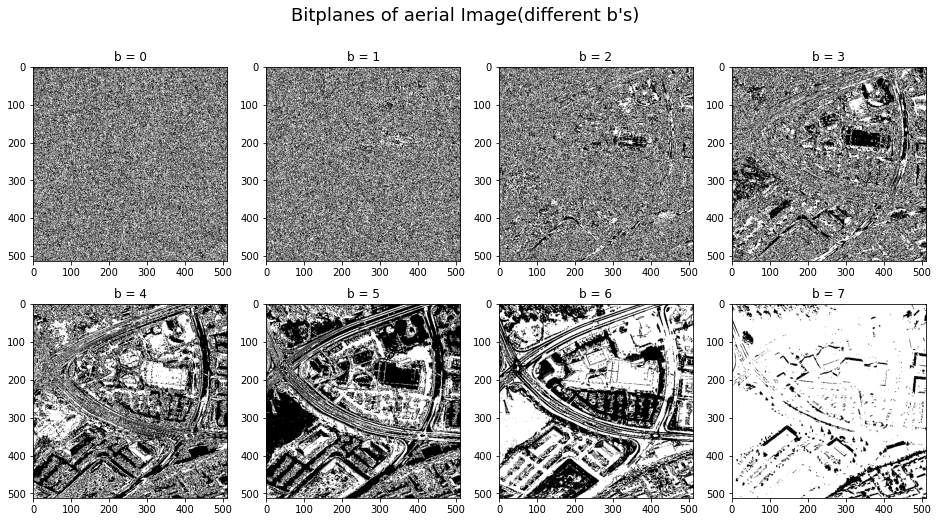

In [12]:
def displayAllBitPlanes(img:np.ndarray, img_name:str):
    
    plt.figure(figsize=(16, 8))
    for i in range(0, 8):
        aerial_b = getBitplane(img, i)
        plt.subplot(2, 4, i + 1)
        plt.imshow(aerial_b, cmap='gray')
        plt.title(f"b = {i}")

    plt.suptitle(f"Bitplanes of {img_name} Image(different b's)", fontsize=18)
    plt.show()

    
displayAllBitPlanes(aerial, "aerial")

# PART-3 : Binary Image Processing
For this part, work with the gray scale images airplane, truck, airport, APC.

### Q1
 Write a function to compute the histogram of an image and plot the same. What is the modality of the
histogram for the images mentioned above?

In [57]:
def create_histogram(I: np.ndarray):
    """
        Returns a histogram for the pixel values in the input image array(I).
        Params:
            I : A 2d numpy array representing the gray-scale image
    
                                                                                """
    min_pixel_value = np.min(I)
    max_pixel_value = np.max(I)   
    
    # Create a freq array
    freq_array = np.zeros(max_pixel_value + 1, dtype=int)     
    flattened_I = I.flatten()
    pixel_values, pixel_counts = np.unique(flattened_I, return_counts=True)
    freq_array[pixel_values] = pixel_counts

    return freq_array



def plot_histogram(I: np.ndarray, title="Histogram of I"):
    """
        Funtion to plot  a histogram for the pixel values in the input image array.
                                                                                            """
    hist_data = create_histogram(I)
    
    plt.figure(figsize=(5, 5))
    plt.bar(range(len(hist_data)), hist_data, color='lightgreen', edgecolor='red')
    
    plt.ylabel('$H_I(k)$')
    plt.xlabel('gray level k')
    plt.title(title, fontsize=16)

    plt.show()
    

### Plotting the histogram for the images mentioned above

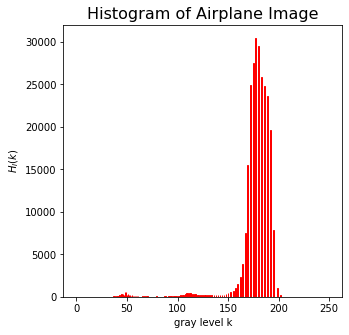

From the histogram of airplane, it seems it is UNIMODAL 



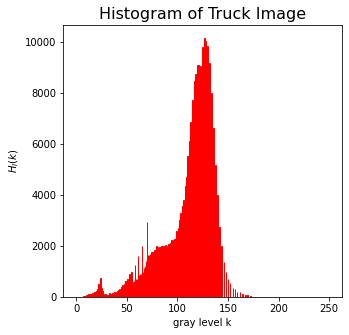

From the histogram of truck, it seems it is BIMODAL 



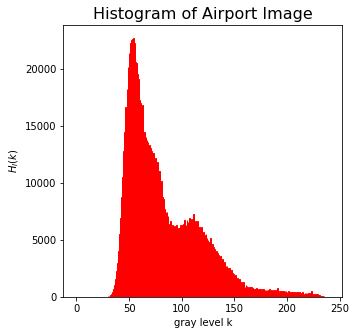

From the histogram of Airport, it seems it is BIIMODAL 



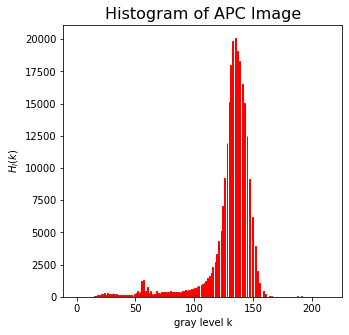

From the histogram of APC, it seems it is UNIMODAL. The peak around 55 is ignored as only 2 bins are there



In [60]:
plot_histogram(airplane, "Histogram of Airplane Image")
print("From the histogram of airplane, it seems it is UNIMODAL \n")
plot_histogram(truck, "Histogram of Truck Image")
print("From the histogram of truck, it seems it is BIMODAL \n")
plot_histogram(airport, "Histogram of Airport Image")
print("From the histogram of Airport, it seems it is BIIMODAL \n")
plot_histogram(APC, "Histogram of APC Image")
print("From the histogram of APC, it seems it is UNIMODAL. The peak around 55 is ignored as only 2 bins are there\n")

### Q2.
Binarize I using the above histogram following the modal thresholding approach discussed in class.

In [15]:
def binarise_via_thresholding(I: np.ndarray, threshold:int):
    binary_image = (I >= threshold).astype(int)          # converts all pixels with values >=threshold to 1
    return binary_image

### Demonstration using Airplane and Truck

In [16]:
def plot_img_and_binarised_img_side_by_side(img:np.ndarray, threshold:int, img_name:str):    

    binary_img = binarise_via_thresholding(img, threshold)
    
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"{img_name}")


    plt.subplot(1, 2, 2)
    plt.imshow(binary_img, cmap='gray')
    plt.title(f"Binarised {img_name}")

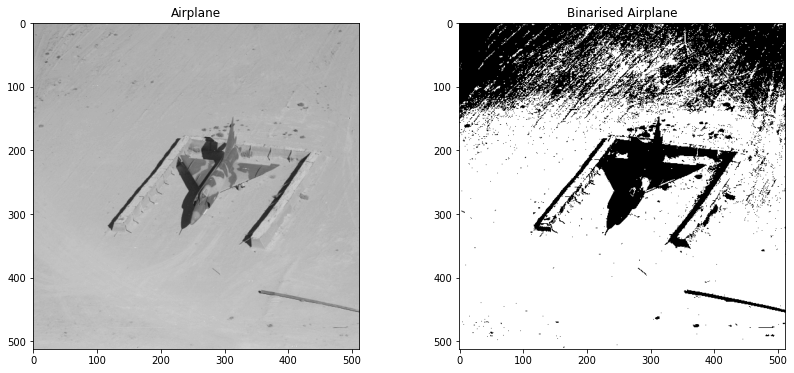

In [17]:
# Define Threshold (from histogram) 
threshold = 175
plot_img_and_binarised_img_side_by_side(airplane, threshold, "Airplane")

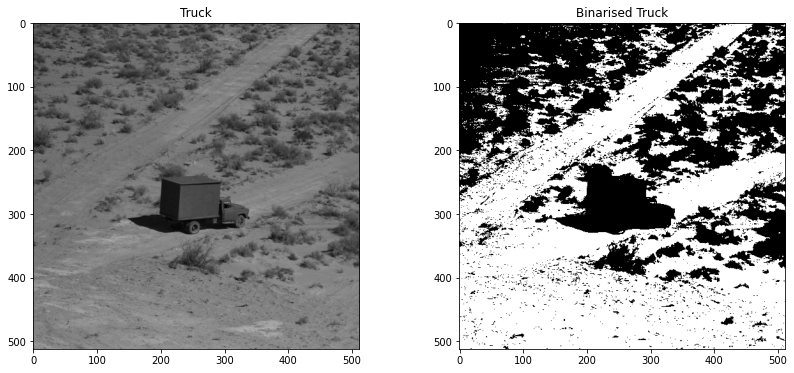

In [18]:
# Define Threshold (from histogram) 
threshold = 110
plot_img_and_binarised_img_side_by_side(truck, threshold, "Truck")

### Q3
Implement Otsu’s algorithm in two ways.
### Part-a

In [19]:
def intra_class_var_otsu(I: np.ndarray):
    
    min_pixel_value = np.min(I)
    max_pixel_value = np.max(I)
    total_pixels = I.size 
    intra_class_vars_arr = np.zeros(max_pixel_value - min_pixel_value)
    
    for t in range(min_pixel_value + 1, max_pixel_value + 1):
        gray_level_0 = I < t
        gray_level_1 = I >= t
        
        count_0 = np.sum(gray_level_0)
        P_0 = count_0/total_pixels
        P_1 = 1 - P_0
        
        var_0 = np.var(I[gray_level_0])
        var_1 = np.var(I[gray_level_1])
        
        intra_class_var = P_0 * var_0 + P_1 + var_1
        intra_class_vars_arr[t - min_pixel_value - 1] = intra_class_var
        
    
    threshold = np.argmin(intra_class_vars_arr) + min_pixel_value + 1
    min_intra_class_var = np.min(intra_class_vars_arr)
    
    return threshold, min_intra_class_var, intra_class_vars_arr

### Part (b)

In [20]:
def inter_class_var_otsu(I: np.ndarray):
    
    min_pixel_value = np.min(I)
    max_pixel_value = np.max(I)
    total_pixels = I.size 
    
    # Create a normalised hist or pmf
    hist = create_histogram(I)
    probs = hist / np.sum(hist)
    
    # Initialisation
    P_0 = probs[min_pixel_value]
    mu_0 = 0
    mu = np.mean(I)
    inter_class_vars_arr = np.zeros(max_pixel_value - min_pixel_value + 1)

    # Sweep over all possible values of threshold
    for t in range(min_pixel_value, max_pixel_value - 1):       
        P_0_new = P_0 + probs[t + 1] 
        mu_0_new = (mu_0 * P_0 + (t + 1) * probs[t + 1])/P_0_new
        mu_1_new = (mu - mu_0_new * P_0_new)/(1 - P_0_new)
        inter_class_var = P_0_new * (1 - P_0_new) * (mu_0_new - mu_1_new)**2
        
        # Update
        inter_class_vars_arr[t - min_pixel_value] = inter_class_var
        P_0 = P_0_new
        mu_0 = mu_0_new
        
    threshold = np.argmax(inter_class_vars_arr) + min_pixel_value
    max_inter_class_var = np.max(inter_class_vars_arr)
    
    return threshold, max_inter_class_var, inter_class_vars_arr

## Question 3) a and b
For each method, your program should output the “optimal” threshold t∗ and display the corresponding binary image. Demonstrate your solution using any of the gray scale images mentioned above.

### Plot a) Using intra-class otsu's method

In [21]:
def plot_img_and_OTSU_binarised_img_side_by_side(img:np.ndarray, threshold:int, img_name:str, OTSU_method:str):    

    binary_img = binarise_via_thresholding(img, threshold)
    print(f"The threshold using otsu's {OTSU_method} class variance = {threshold}")

    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"{img_name}")


    plt.subplot(1, 2, 2)
    plt.imshow(binary_img, cmap='gray')
    plt.title(f"Binarised {img_name}")

    plt.suptitle(f"Demonstration of OTSU's {OTSU_method}-class method on {img_name}", fontsize=15)

The threshold using otsu's intra class variance = 133


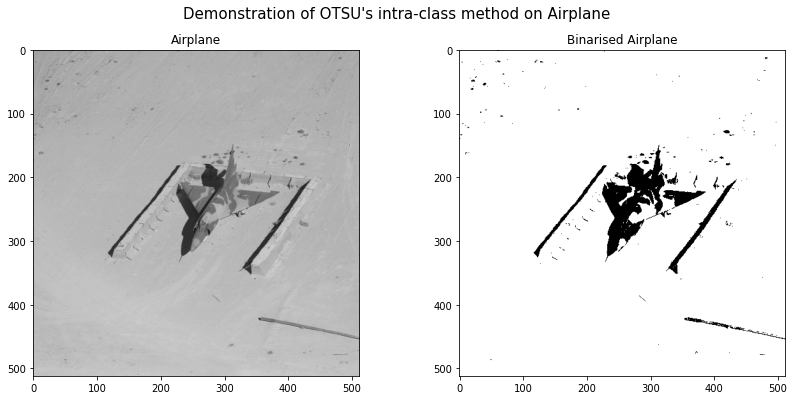

In [22]:
threshold, _, _ = intra_class_var_otsu(airplane)

plot_img_and_OTSU_binarised_img_side_by_side(airplane, threshold, "Airplane", "intra")

The threshold using otsu's intra class variance = 98


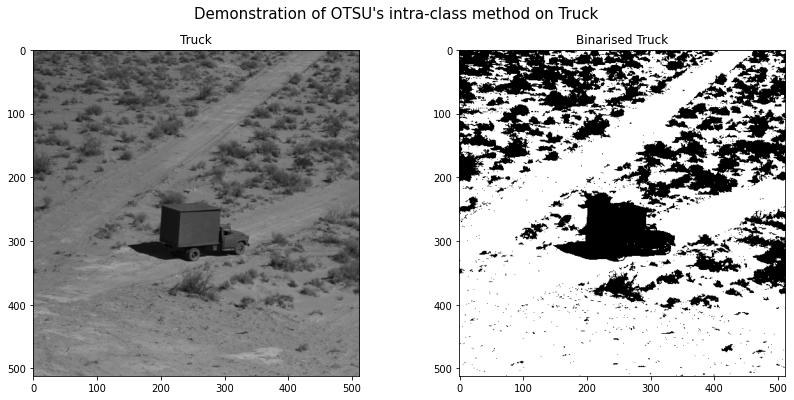

In [23]:
threshold, _, _ = intra_class_var_otsu(truck)

plot_img_and_OTSU_binarised_img_side_by_side(truck, threshold, "Truck", "intra")

The threshold using otsu's intra class variance = 95


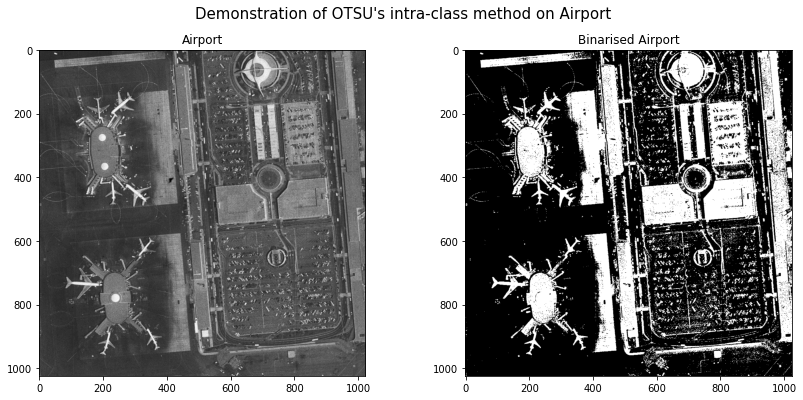

In [24]:
threshold, _, _ = intra_class_var_otsu(airport)

plot_img_and_OTSU_binarised_img_side_by_side(airport, threshold, "Airport", "intra")

The threshold using otsu's intra class variance = 100


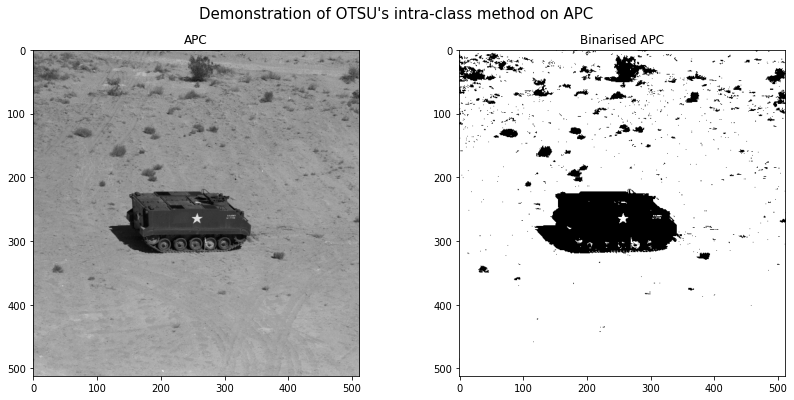

In [25]:
threshold, _, _ = intra_class_var_otsu(APC)

plot_img_and_OTSU_binarised_img_side_by_side(APC, threshold, "APC", "intra")

### plot b) Using Inter-class otsu's method

The threshold using otsu's inter class variance = 131


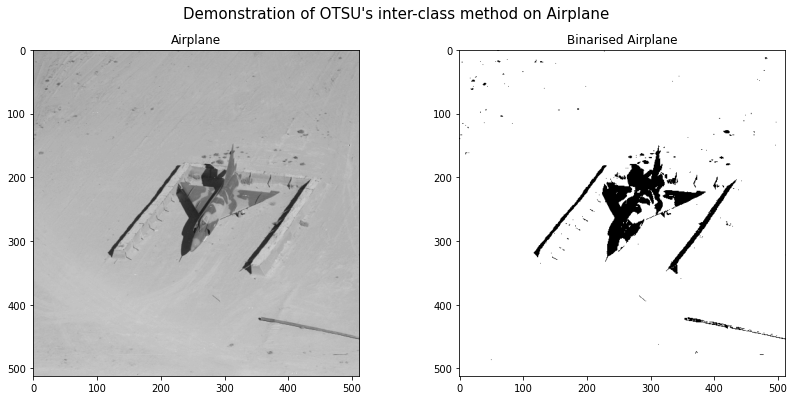

In [26]:
threshold, _, _ = inter_class_var_otsu(airplane)
binary_airplane = binarise_via_thresholding(airplane, threshold)

plot_img_and_OTSU_binarised_img_side_by_side(airplane, threshold, "Airplane", "inter")

The threshold using otsu's inter class variance = 95


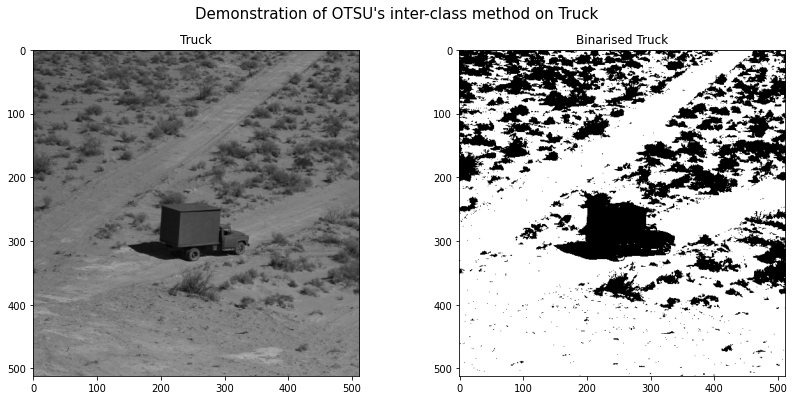

In [27]:
threshold, _, _ = inter_class_var_otsu(truck)
binary_truck = binarise_via_thresholding(truck, threshold)

plot_img_and_OTSU_binarised_img_side_by_side(truck, threshold, "Truck", "inter")

The threshold using otsu's inter class variance = 94


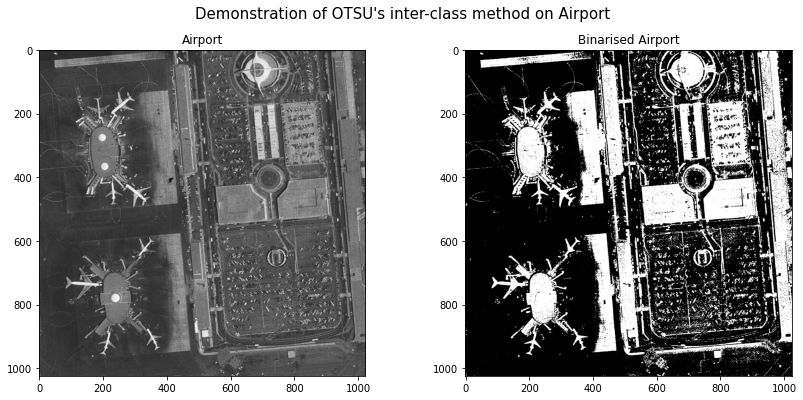

In [28]:
threshold, _, _ = inter_class_var_otsu(airport)
binary_airport = binarise_via_thresholding(airport, threshold)

plot_img_and_OTSU_binarised_img_side_by_side(airport, threshold, "Airport", "inter")

The threshold using otsu's inter class variance = 98


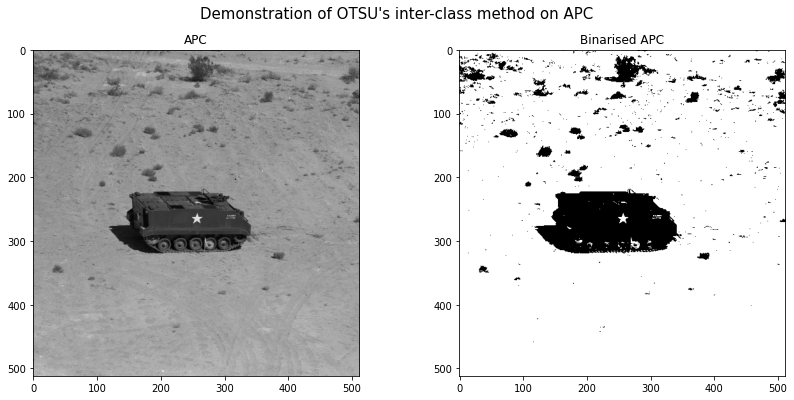

In [29]:
threshold, _, _ = inter_class_var_otsu(APC)
binary_apc = binarise_via_thresholding(APC, threshold)

plot_img_and_OTSU_binarised_img_side_by_side(APC, threshold, "APC", "inter")

### Q4.
Implement the connected components algorithm and use it to label the binarized version of I. Demonstrate your result using any of the gray scale images mentioned above. 

In [30]:
def simplify_look_up_dict(d: dict, key):
    while key in d:
        key = d[key]
        
    return key


def connected_components(bin_I:np.ndarray, background=1):
    """
        Identify connected components in a binary image using two-pass algorithm(as was discussed in class)
            Returns a tuple containing the number of connected components and a 2D array with labeled regions.
        Args:
            bin_I: the binary image as a 2d numpy array
            background: the value representing background(default is 1 i.e white)
        
        • Assumption: border pixels are background(default=1) and have the same value. 
                    Hence, the image is assumed to be padded by the background value at borders.

                                                                                                                """

    region_ctr = 2
    height, width = bin_I.shape
    foreground = 1 - background
    look_up_dict = {}
    region_arr = np.copy(bin_I)
    
    # First pass of the binary Image(Assum)
    for i in range(height):
        for j in range(width):
            
            if region_arr[i][j] == background:
                continue
            
            if i == 0 and j == 0:                  # no bin_I[i][j - 1] or bin_I[i - 1][j], hence assume to be background
                region_arr[i][j] = region_ctr
                region_ctr += 1
            
            elif i == 0:    # we are going through the top row check only bin_I[i][j - 1]
                if region_arr[i][j - 1] > 1:
                    region_arr[i][j] = region_arr[i][j - 1]
                else:
                    region_arr[i][j] = region_ctr
                    region_ctr += 1
            
            
            elif j == 0:    # we are going through the left column, check only bin_I[i - 1][j]
                if region_arr[i - 1][j] > 1:
                    region_arr[i][j] = region_arr[i - 1][j] 
                else:
                    region_arr[i][j] = region_ctr
                    region_ctr += 1 
            
            else:
                if region_arr[i - 1][j] == background and region_arr[i][j - 1] == background :
                    region_arr[i][j] = region_ctr
                    region_ctr += 1 
                    
                elif region_arr[i - 1][j] == background and region_arr[i][j - 1] > 1:
                    region_arr[i][j] = region_arr[i][j - 1] 
                    
                elif region_arr[i - 1][j] > 1 and region_arr[i][j - 1] == background:
                    region_arr[i][j] = region_arr[i - 1][j] 
                
                else:
                    region_arr[i][j] = min(region_arr[i - 1][j], region_arr[i][j - 1])
                    if region_arr[i - 1][j] != region_arr[i][j - 1]:
                        # Update our look-up dict for second pass for linking later
                        look_up_dict[max(region_arr[i - 1][j], region_arr[i][j - 1])] = min(region_arr[i - 1][j], region_arr[i][j - 1])
       
      
    modified_look_up_dict = {k: simplify_look_up_dict(look_up_dict, k) for k in look_up_dict}
    # Second pass of the binary image
    for i in range(height):
        for j in range(width):
            if region_arr[i][j] == background:
                continue
                
            if region_arr[i][j] in modified_look_up_dict.keys():
                region_arr[i][j] = modified_look_up_dict[region_arr[i][j]]
            
    
    n_conn_comps = len(np.unique(region_arr)) - 1
    
    return n_conn_comps, region_arr

### PRINTING THE NUMBER OF COMPONENTS

In [31]:
# All the binary images here were binarised using the THRESHOLD via "OTSU'S INTER-CLASS VARIANCE"
ncc_airplane, reg_arr_airplane = connected_components(binary_airplane)
ncc_truck, reg_arr_truck = connected_components(binary_truck)
ncc_airport, reg_arr_airport = connected_components(binary_airport)
ncc_apc, reg_arr_apc = connected_components(binary_apc)

print("All the binary images here, were binarised using the THRESHOLD via 'OTSU'S INTER-CLASS VARIANCE' \n")
print("The number of connected components of the Binarised Airplane = ", ncc_airplane)
print("The number of connected components of the Binarised Truck = ", ncc_truck)
print("The number of connected components of the Binarised Airport = ", ncc_airport)
print("The number of connected components of the Binarised APC = ", ncc_apc)

All the binary images here, were binarised using the THRESHOLD via 'OTSU'S INTER-CLASS VARIANCE' 

The number of connected components of the Binarised Airplane =  224
The number of connected components of the Binarised Truck =  1251
The number of connected components of the Binarised Airport =  5651
The number of connected components of the Binarised APC =  803


### Q5.
Implement minor blob removal to get rid of minor blobs. Demonstrate your result using the gray
scale image you used in the previous question.

In [32]:
def remove_minor_blobs(bin_I: np.ndarray, region_arr: np.ndarray, background=1):
    height, width = region_arr.shape
    freq = {}
    # Find m = the label of the largest blob
    for i in range(height):
        for j in range(width):
            if region_arr[i][j] <= 1:
                continue
                
            if region_arr[i][j] not in freq:
                freq[region_arr[i][j]] = 1
            else:
                freq[region_arr[i][j]] += 1
    
    m = max(freq, key=freq.get)
    
    # First scan to remove outer minor blobs
    for i in range(height):
        for j in range(width):
            if region_arr[i][j] > 1 and region_arr[i][j] != m:
                bin_I[i][j] = background

    return bin_I
  
    
    
def minor_blob_removal(bin_I: np.ndarray, region_arr: np.ndarray, background=1):
    
    # First scan to remove outer minor blobs
    bin_I = remove_minor_blobs(bin_I, region_arr, background)
      
    # Second scan for clean-up : STEPS
    # 1. Complement
    complement_bin_I = bin_I ^ 1
    
    # 2. Count blobs 
    n_comps, complement_region_arr = connected_components(complement_bin_I, background=1)
    
    # 3. Minor blob removal 
    complement_bin_I = remove_minor_blobs(complement_bin_I, complement_region_arr, background)
    
    # 4. Complement
    return bin_I, complement_bin_I ^ 1
    

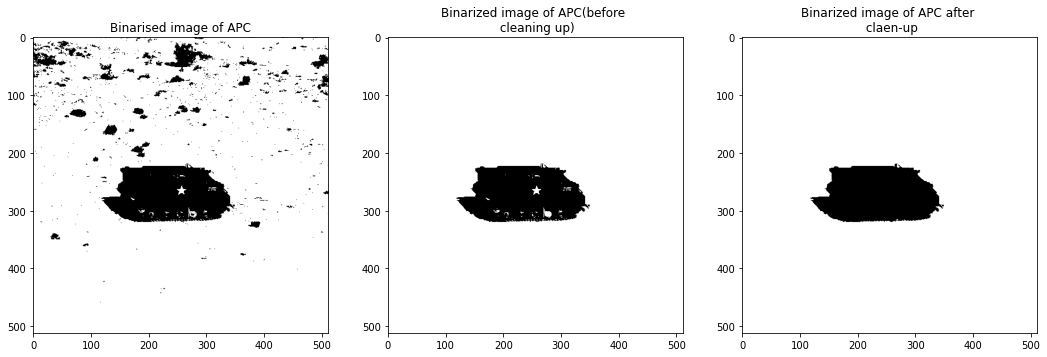

In [33]:
# airplane - 7.1.02, APC - 7.1.08, Truck - 7.1.01, airport - 5.3.02

threshold, _, _ = intra_class_var_otsu(APC)

bin_apc = binarise_via_thresholding(APC, threshold)

# Connected components algo to obtain the number of connected components, and region arr
n_cc_apc , region_arr_apc = connected_components(bin_apc , 1)

# # plotting the binarised image side by side
plt.figure(figsize = (18 , 10))

plt.subplot(1 , 3 , 1)
plt.imshow(bin_apc , cmap = 'gray')
plt.title("Binarised image of APC")

# Minor blob removal
before_apc, after_apc = minor_blob_removal(bin_apc ,region_arr_apc , 1)

plt.subplot(1 , 3 , 2)
plt.imshow(before_apc , cmap = 'gray')
plt.title("Binarized image of APC(before \n cleaning up)")

plt.subplot(1 , 3 , 3)
plt.imshow(after_apc , cmap = 'gray')
plt.title("Binarized image of APC after \n claen-up")

plt.show()

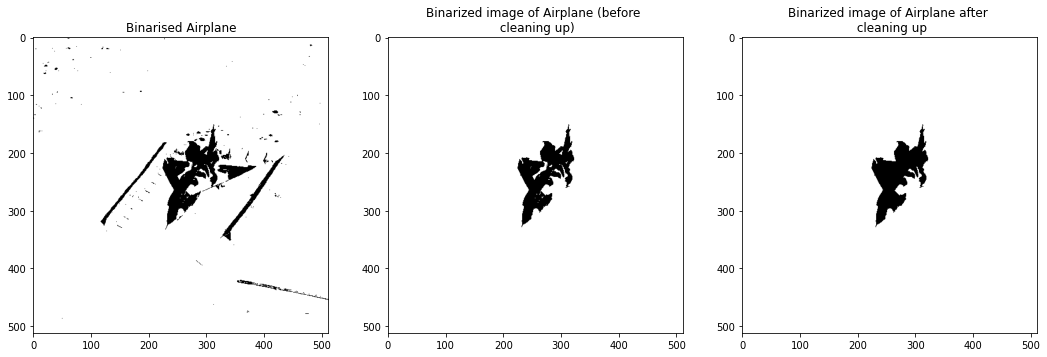

In [34]:
# airplane - 7.1.02, APC - 7.1.08, Truck - 7.1.01, airport - 5.3.02

threshold, _, _ = inter_class_var_otsu(airplane)
bin_airplane = binarise_via_thresholding(airplane, threshold)

# Connected components algo to obtain the number of connected components, and region arr
n_cc_apc , region_arr_apc = connected_components(bin_airplane , 1)


# # plotting the binarised image side by side
plt.figure(figsize = (18 , 10))

plt.subplot(1, 3, 1)
plt.imshow(bin_airplane, cmap='gray')
plt.title("Binarised Airplane")


# Minor blob removal
before_airplane, after_airplane = minor_blob_removal(bin_airplane ,region_arr_apc , 1)

plt.subplot(1 , 3 , 2)
plt.imshow(before_airplane , cmap = 'gray')
plt.title("Binarized image of Airplane (before \n cleaning up)")

plt.subplot(1 , 3 , 3)
plt.imshow(after_airplane , cmap = 'gray')
plt.title("Binarized image of Airplane after \n cleaning up")

plt.show()

# PART-4: Binary Image Processing

### Q1.
Implement the following filters that accept a binary image I and window B as inputs: DILATE,
ERODE, MEDIAN. Filter the above binary image using the following windows B = CROSS(5), B =
SQUARE(3) (meaning the side of the square window is 3 pixels). Use the binary images generated in
the previous question as input to this function.

In [35]:
def add_reflection_padding(bin_I, p_size):
    """ 
        Add padding to a binary image using reflection padding according to specified padding size.
        It first reflects the image pixels about the x-axis i.e top and bottom sides 
        It then reflects about the y-axis, including the top and bottom ones added
        Args: 
            bin_I: the binary image as a numpy 2D array
            p_size: an integer representing the padding size(assumed to be same across both axes)
        Returns:
            The reflection padded image

                                                                                                        """
    h, w = bin_I.shape
    new_bin_I = np.zeros((h + 2 * p_size, w + 2 * p_size))

    # Copy the original binary image to centre
    new_bin_I[p_size:p_size + h, p_size:p_size + w] = bin_I
    
    # Reflect the top and bottom sides
    new_bin_I[:p_size, p_size:w + p_size] = new_bin_I[p_size: 2*p_size,p_size:w + p_size][ ::-1, :]
    new_bin_I[h + p_size:h + 2*p_size, p_size:w + p_size] = new_bin_I[h:h + p_size,p_size:w + p_size][ ::-1, :]

    
    # Then Reflect the left and right sides, including the top and bottom ones added
    new_bin_I[:h + p_size, :p_size] = new_bin_I[:h + p_size, p_size: 2*p_size][:, ::-1]
    new_bin_I[:h + p_size, w + p_size:w + 2*p_size] = new_bin_I[:h + p_size, w:w + p_size][:, ::-1]

    return new_bin_I

In [36]:
# DILATE = OR{B ⋄ I(i, j)} = OR{{I(i − p, j − q); (p, q) ∈ B}}
def dilate(bin_I:np.ndarray, window:np.ndarray, background=1):
    """
        Perform binary dilation on the input binary image using the given structuring window.
        And returns the new binary image after dilation
        Args:
            bin_I: the binary image as 2D numpy array
            window: Structuring window as a 2D NumPy array.
            background: white colour by default: value representing the background

                                                                                                        """

    h, w = bin_I.shape
    new_I = np.zeros((h, w), dtype=np.uint8) + background
    foreground = 1 - background
    
    # get the padding size from window and get the padded image
    p_size = np.max(np.abs(window))  
    padded_I = add_reflection_padding(bin_I, p_size)
    
    for i in range(h):
        for j in range(w):
            p_x = i + p_size
            p_y = j + p_size
            for x, y in window:
                if padded_I[p_x + x, p_y + y] == foreground:
                    new_I[i][j] = foreground
                    break
                
    
    return new_I

In [37]:
def erode(bin_I:np.ndarray, window:np.ndarray, background=1):
    """
        Perform binary erosion on the input binary image using the given structuring window.
        And returns the new binary image after erosion
        Args:
            bin_I: the binary image as 2D numpy array
            window: Structuring window as a 2D NumPy array.
            background: white colour by default: value representing the background

                                                                                                        """
    
    h, w = bin_I.shape
    foreground = 1 - background
    new_I = np.zeros((h, w), dtype=np.uint8) + foreground
    
    # get the padding size from window and get the padded image
    p_size = np.max(np.abs(window))  
    padded_I = add_reflection_padding(bin_I, p_size)
    
    for i in range(h):
        for j in range(w):
            p_x = i + p_size
            p_y = j + p_size
            for x, y in window:
                if padded_I[p_x + x, p_y + y] != foreground:
                    new_I[i][j] = background
                    break
                
    
    return new_I

In [38]:
def median(bin_I:np.ndarray, window:np.ndarray, background=1):
    """
        Perform binary median filtering on the input binary image using the given structuring window.
        And returns the new binary image after the operation
        Args:
            bin_I: the binary image as 2D numpy array
            window: Structuring window as a 2D NumPy array.
            background: white colour by default: value representing the background

                                                                                                        """
    
    h, w = bin_I.shape
    foreground = 1 - background
    new_I = np.zeros((h, w), dtype=np.uint8)
    
    # get the padding size from window and get the padded image
    p_size = np.max(np.abs(window))  
    padded_I = add_reflection_padding(bin_I, p_size)
    
    for i in range(h):
        for j in range(w):
            p_x = i + p_size
            p_y = j + p_size
            foreground_count = 0
            for x, y in window:
                if padded_I[p_x + x, p_y + y] == foreground:
                    foreground_count += 1
                    
            if foreground_count > window.shape[0]//2:
                new_I[i][j] = foreground
            else:
                new_I[i][j] = background
    
    
    return new_I

### Demonstration 
Use the binary images generated in the previous question as input to this function.
- We will use APC image for illustration

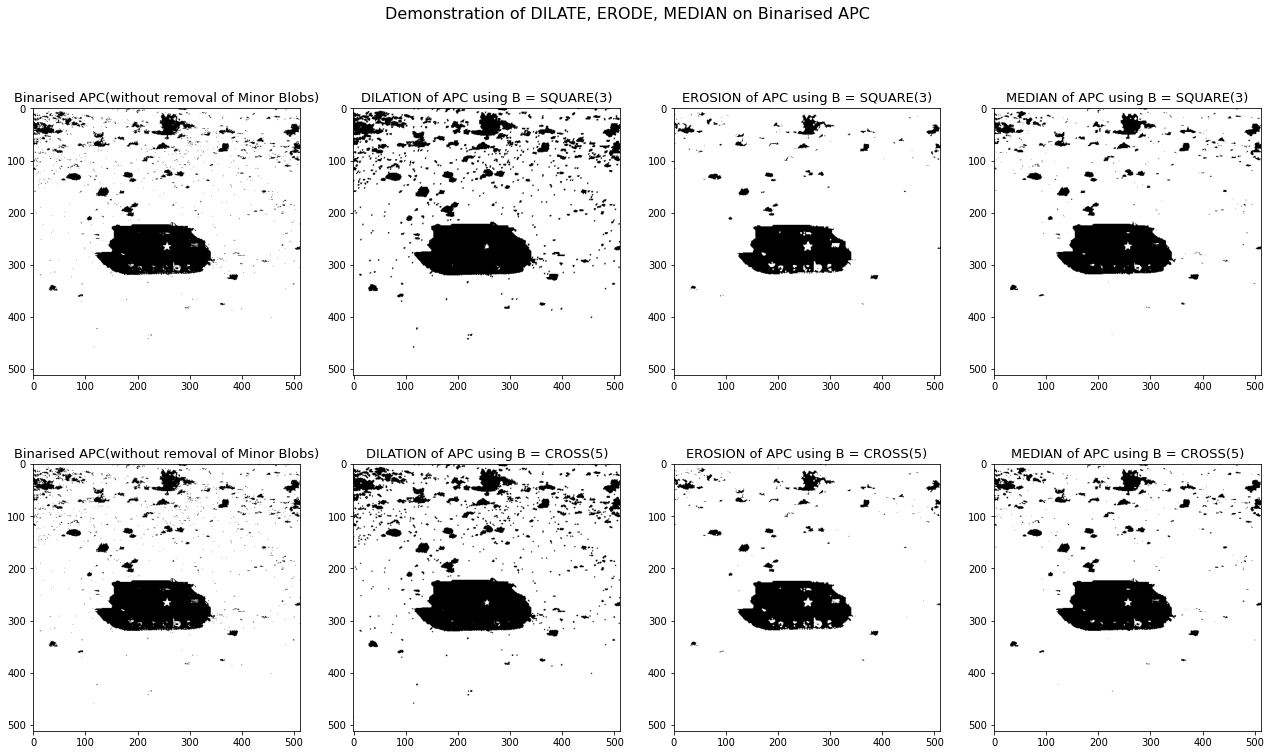

In [39]:
# airplane - 7.1.02, APC - 7.1.08, Truck - 7.1.01, airport - 5.3.02

threshold, _, _ = intra_class_var_otsu(APC)

bin_apc = binarise_via_thresholding(APC, threshold)

# Define the various windows
square_3 = np.array([[-1,1] , [0,1] , [1,1] , [-1,0] , [0,0] , [1,0] , [1,-1] , [1,0] , [1,1]])
cross_5 = np.array([[-1,0] , [0,-1] , [0,0] , [0,1] , [1,0]])

plt.figure(figsize = (22 , 12))

plt.subplot(2, 4 , 1)
plt.imshow(bin_apc , cmap = 'gray')
plt.title("Binarised APC(without removal of Minor Blobs)", fontsize=13)

plt.subplot(2, 4 , 2)
plt.imshow(dilate(bin_apc, square_3) , cmap = 'gray')
plt.title("DILATION of APC using B = SQUARE(3)", fontsize=13)

plt.subplot(2, 4 , 3)
plt.imshow(erode(bin_apc, square_3) , cmap = 'gray')
plt.title("EROSION of APC using B = SQUARE(3)", fontsize=13)

plt.subplot(2, 4 , 4)
plt.imshow(median(bin_apc, square_3) , cmap = 'gray')
plt.title("MEDIAN of APC using B = SQUARE(3)", fontsize=13)

plt.subplot(2, 4 , 5)
plt.imshow(bin_apc , cmap = 'gray')
plt.title("Binarised APC(without removal of Minor Blobs)", fontsize=13)

plt.subplot(2, 4 , 6)
plt.imshow(dilate(bin_apc, cross_5) , cmap = 'gray')
plt.title("DILATION of APC using B = CROSS(5)", fontsize=13)

plt.subplot(2, 4 , 7)
plt.imshow(erode(bin_apc, cross_5) , cmap = 'gray')
plt.title("EROSION of APC using B = CROSS(5)", fontsize=13)

plt.subplot(2, 4 , 8)
plt.imshow(median(bin_apc, cross_5) , cmap = 'gray')
plt.title("MEDIAN of APC using B = CROSS(5)", fontsize=13)

plt.suptitle("Demonstration of DILATE, ERODE, MEDIAN on Binarised APC", fontsize=16)
plt.show()

### Q2.
Verify that DILATE and ERODE operators are duals of each other with respect to complementation.
Also verify that the MEDIAN operator is its own dual with respect to complementation. Show that
the difference between the images from the direct and complement paths is indeed zero.

In [40]:
def verify_dual_wrt_complement(bin_I, operator1, operator2, window):
    
    # I -> complement -> operator1 -> complement 
    complement_bin_I = bin_I ^ 1
    op1_img = operator1(complement_bin_I, window)
    op1_final_img = op1_img ^ 1
    
    # I -> operator2
    op2_img = operator2(bin_I, window)
    
    return np.all(op1_final_img  == op2_img)

### Verification for apc (Square(3) filter)
- DILATE and ERODE operators are duals of each other with respect to complementation.

In [41]:
threshold, _, _ = intra_class_var_otsu(APC)

bin_apc = binarise_via_thresholding(APC, threshold)

square_3 = np.array([[-1,1] , [0,1] , [1,1] , [-1,0] , [0,0] , [1,0] , [1,-1] , [1,0] , [1,1]])


if verify_dual_wrt_complement(bin_apc, dilate, erode, square_3) == True:
    print("YES! DILATE and ERODE operators are duals of each other with respect to complementation.")
else:
    print("N0, DILATE and ERODE operators are NOT duals of each other with respect to complementation.")

YES! DILATE and ERODE operators are duals of each other with respect to complementation.


- The MEDIAN operator is its own dual with respect to complementation

In [42]:
if verify_dual_wrt_complement(bin_apc, median, median, square_3):
    print("Yes! The MEDIAN operator is its own dual with respect to complementation.")
else:
    print("NO, The MEDIAN operator is NOT its own dual with respect to complementation.")

Yes! The MEDIAN operator is its own dual with respect to complementation.


### Verification for apc using (CROSS(5)) filter
- DILATE and ERODE operators are duals of each other with respect to complementation.

In [43]:

if verify_dual_wrt_complement(bin_apc, dilate, erode, cross_5) == True:
    print("YES! DILATE and ERODE operators are duals of each other with respect to complementation.")
else:
    print("N0, DILATE and ERODE operators are NOT duals of each other with respect to complementation.")
    

YES! DILATE and ERODE operators are duals of each other with respect to complementation.


In [44]:

if verify_dual_wrt_complement(bin_apc, median, median, cross_5):
    print("Yes! The MEDIAN operator is its own dual with respect to complementation.")
else:
    print("NO, The MEDIAN operator is NOT its own dual with respect to complementation.")

Yes! The MEDIAN operator is its own dual with respect to complementation.


### Q3.
Implement the compound operators OPEN and CLOSE using the basic filters implemented above.
Use the same windows as in the previous problem

In [45]:
def OPEN(I, window, background=1):
    return dilate(erode(I, window, background), window, background)

def CLOSE(I, window, background=1):
    return erode(dilate(I, window, background), window, background)

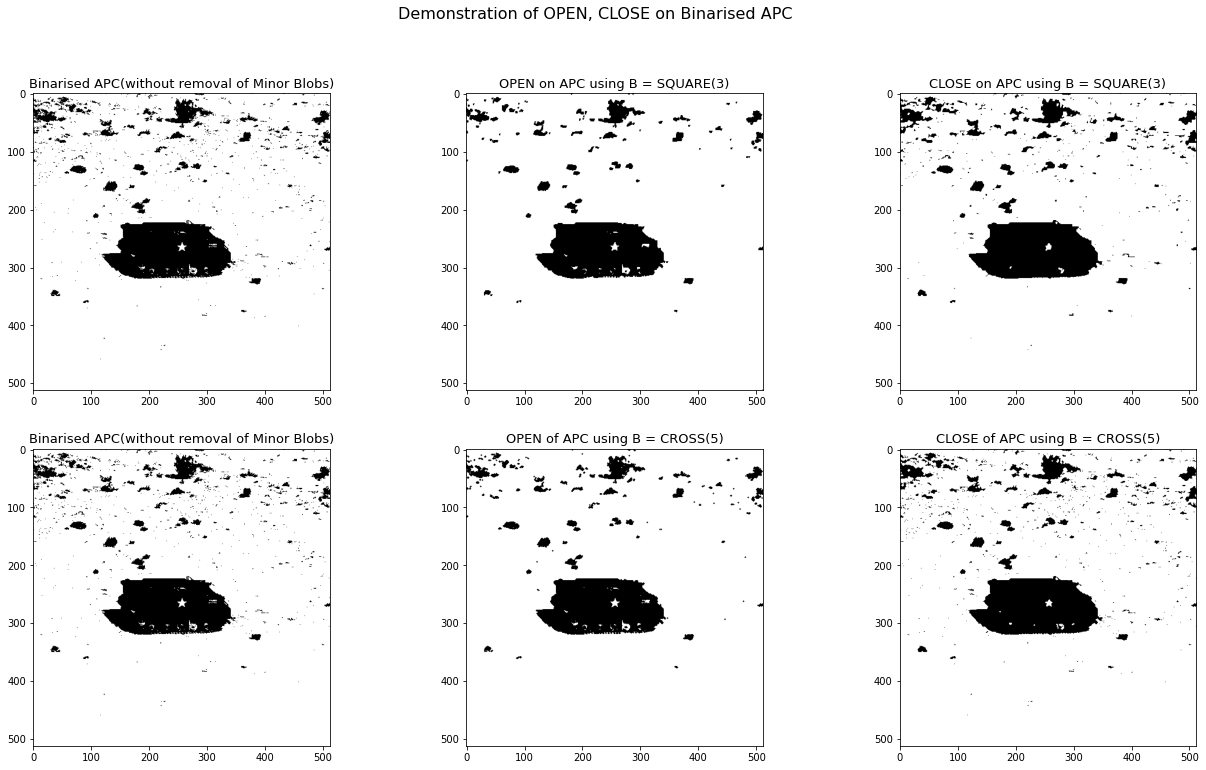

In [46]:
threshold, _, _ = intra_class_var_otsu(APC)
bin_apc = binarise_via_thresholding(APC, threshold)

plt.figure(figsize = (22 , 12))

plt.subplot(2, 3 , 1)
plt.imshow(bin_apc , cmap = 'gray')
plt.title("Binarised APC(without removal of Minor Blobs)", fontsize=13)

plt.subplot(2, 3 , 2)
plt.imshow(OPEN(bin_apc, square_3) , cmap = 'gray')
plt.title("OPEN on APC using B = SQUARE(3)", fontsize=13)

plt.subplot(2, 3 , 3)
plt.imshow(CLOSE(bin_apc, square_3) , cmap = 'gray')
plt.title("CLOSE on APC using B = SQUARE(3)", fontsize=13)

plt.subplot(2, 3 , 4)
plt.imshow(bin_apc , cmap = 'gray')
plt.title("Binarised APC(without removal of Minor Blobs)", fontsize=13)

plt.subplot(2, 3 , 5)
plt.imshow(OPEN(bin_apc, cross_5) , cmap = 'gray')
plt.title("OPEN of APC using B = CROSS(5)", fontsize=13)

plt.subplot(2, 3 , 6)
plt.imshow(CLOSE(bin_apc, cross_5) , cmap = 'gray')
plt.title("CLOSE of APC using B = CROSS(5)", fontsize=13)

plt.suptitle("Demonstration of OPEN, CLOSE on Binarised APC", fontsize=16)
plt.show()

### Q4.
Finally, implement OPEN-CLOS and CLOS-OPEN. Filter the binary image using the same windows
as above.

In [47]:
def OPEN_CLOS(I, window, background=1):
    return OPEN(CLOSE(I, window, background), window, background)

def CLOS_OPEN(I, window, background=1):
    return CLOSE(OPEN(I, window, background), window, background)

### Demonstration on "APC"

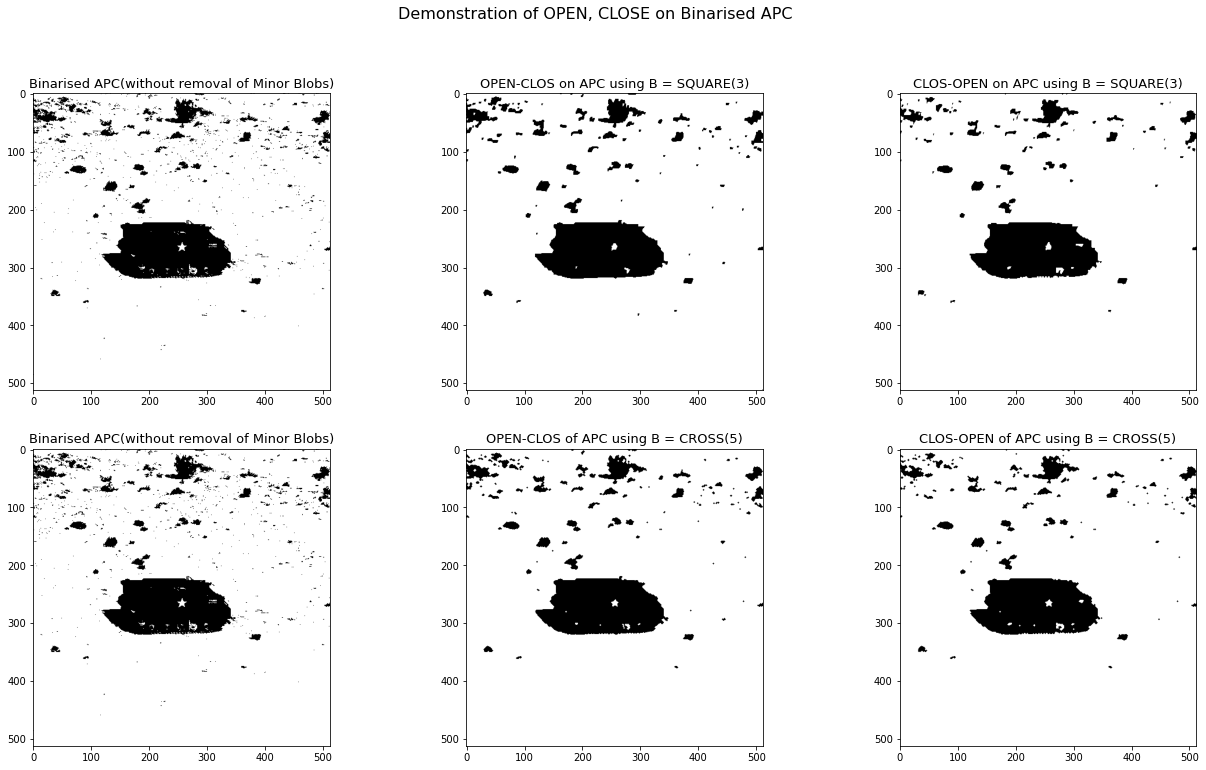

In [48]:
threshold, _, _ = intra_class_var_otsu(APC)
bin_apc = binarise_via_thresholding(APC, threshold)

plt.figure(figsize = (22 , 12))

plt.subplot(2, 3 , 1)
plt.imshow(bin_apc , cmap = 'gray')
plt.title("Binarised APC(without removal of Minor Blobs)", fontsize=13)

plt.subplot(2, 3 , 2)
plt.imshow(OPEN_CLOS(bin_apc, square_3) , cmap = 'gray')
plt.title("OPEN-CLOS on APC using B = SQUARE(3)", fontsize=13)

plt.subplot(2, 3 , 3)
plt.imshow(CLOS_OPEN(bin_apc, square_3) , cmap = 'gray')
plt.title("CLOS-OPEN on APC using B = SQUARE(3)", fontsize=13)

plt.subplot(2, 3 , 4)
plt.imshow(bin_apc , cmap = 'gray')
plt.title("Binarised APC(without removal of Minor Blobs)", fontsize=13)

plt.subplot(2, 3 , 5)
plt.imshow(OPEN_CLOS(bin_apc, cross_5) , cmap = 'gray')
plt.title("OPEN-CLOS of APC using B = CROSS(5)", fontsize=13)

plt.subplot(2, 3 , 6)
plt.imshow(CLOS_OPEN(bin_apc, cross_5) , cmap = 'gray')
plt.title("CLOS-OPEN of APC using B = CROSS(5)", fontsize=13)

plt.suptitle("Demonstration of OPEN, CLOSE on Binarised APC", fontsize=16)
plt.show()

### Q5.
For the APC image, count the number of pixels in the object of interest - i.e., the military vehicle. Use
the blob counting code from the previous problem

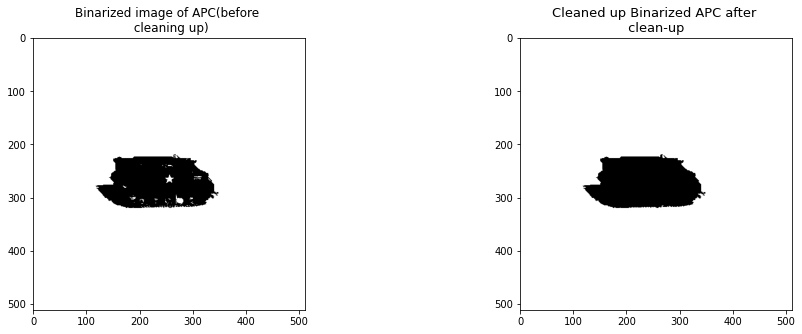

In [49]:
threshold, _, _ = intra_class_var_otsu(APC)
bin_apc = binarise_via_thresholding(APC, threshold)

# Connected components algo to obtain the number of connected components, and region arr
n_cc_apc , region_arr_apc = connected_components(bin_apc , 1)

# Minor blob removal
before_apc, after_apc = minor_blob_removal(bin_apc ,region_arr_apc , 1)
plt.figure(figsize = (16 , 5))


plt.subplot(1, 2, 1)
plt.imshow(before_apc , cmap = 'gray')
plt.title("Binarized image of APC(before \n cleaning up)")

plt.subplot(1, 2, 2)
plt.imshow(after_apc , cmap = 'gray')
plt.title("Cleaned up Binarized APC after \n clean-up ", fontsize=13)

plt.show()

In [50]:
# Counting the number of pixels in the object of interest
# We will count the number of black pixels in the image "after_apc": the cleaned up image
# Black = 0, White = 1
#  n_black_pixels = Total Image pixels - White pixels = Image size - Sum of all pixel values [since black = 0]

n_black_pixels = after_apc.size - np.sum(after_apc)
print(f"For the APC image, count the number of pixels in the object of interest i.e. the military vehicle = {n_black_pixels}")

For the APC image, count the number of pixels in the object of interest i.e. the military vehicle = 17098
